# Problem Statement

According to the National Bereau of Statistics (NBS) report of 2022, the unemployment rate in Nigeria is estimated to reach 33 percent, with the unemployment rate for people aged 25 to 34 at 37.2 percent. Nevertheless, Nigerian tertiary institutions continue to roll out graduates to the labor market yearly despite having only a few jobs available for them. These graduates suddenly become irrelevant in the job market either due to the current trend in jobs of the 21st century or lack of the requisite skills and specialization needed to stay relevant in todays' job market. Hence, there is the need to understand the demand for certain professions and job titles. There is also a need to identify skills that are most frequently required by employers, how the distribution of necessary skills changes over time and what industry tools are required before obtaining a specialization in education. The main objective of this project was to understand the dynamics of the labour market using the online job portal post as a proxy and to provide data driven insights and recommendations to graduates before getting in to the industry.

# Aims and Objectives

The aim of this project is to build a machine learning model that predicts whether a graduate job seeker would be hired, employed or not based  on certain most relevant features found in the dataset. The model should also be deployed so as to be able to make live predictions. This would be achieved by training a machine learning model with job posts, title, job requirement, required qualifications along with other demographics as found in the dataset.

The data can be used in the following ways:

    1.Understand the demand for certain professions, job titles, or industries

    2.Help universities with curriculum development

    3.Identify skills that are most frequently required by employers, and how the distribution of necessary skills changes over time

    4.Make recommendations to job seekers and employers

# Import necessary packages

In [1]:
import numpy as np
import pandas as pd

#for charts and visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud  # We need to install wordcloud package-- Word Cloud is a data visualization technique 
#used for representing text data in which the size of each word  indicates its frequency or importance. 
#Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing 
#data from social network websites, job posting sites and so on.


In [2]:
pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [4]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#for text processing
import string
import re #read more about regular expression here https://docs.python.org/3/library/re.html
import nltk
# # The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic 
# and statistical natural language processing (NLP) for English written in the Python programming language. 
# NLTK includes graphical demonstrations and sample data. 
# It is accompanied by a book that explains the underlying concepts behind the language processing tasks 
# supported by the toolkit, plus a cookbook.Link
from textblob import TextBlob #https://textblob.readthedocs.io/en/dev/

%%html
<a href="https://en.wikipedia.org/wiki/Natural_Language_Toolkit#:~:text=The%20Natural%20Language%20Toolkit%2C%20or,in%20the%20Python%20programming%20language.">more about nltk</a>

In [6]:
#for tokenization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#for feature selection
from sklearn import decomposition

#for model building
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

### Import data

In [7]:
jobs = pd.read_csv('/content/drive/MyDrive/data job posts.csv')


In [8]:
# jobs = jobs.sample(n= 2000)

In [9]:
jobs.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [10]:
jobs.shape

(19001, 24)

In [11]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [12]:
#lowercase the column names
jobs.columns = jobs.columns.str.lower()

In [13]:
jobs.columns

Index(['jobpost', 'date', 'title', 'company', 'announcementcode', 'term',
       'eligibility', 'audience', 'startdate', 'duration', 'location',
       'jobdescription', 'jobrequirment', 'requiredqual', 'salary',
       'applicationp', 'openingdate', 'deadline', 'notes', 'aboutc', 'attach',
       'year', 'month', 'it'],
      dtype='object')

# Data Cleaning

In [14]:
#removing duplicate jobposts based on title and post
 
jobs = jobs.drop_duplicates(['jobpost', 'title'])

In [15]:
jobs.shape

(18892, 24)

In [16]:
#removing records with null title
jobs = jobs[jobs.title.notna()]
jobs.shape

(18865, 24)

# Type of demanding jobs

**1. Preprocessing the text data**

In [17]:
jobs['title'] = jobs['title'].astype('str')

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
#UDF to do basic cleaning of title column to understand type of jobs
def clean_data(text):
    text = text.lower()  # convert all the text into lowercase
    text = text.strip()  #remove starting and trailing whitespaces
    special_chars = re.compile('[@!#$%^&*()<>?/\|}{~:;]')
    text = re.sub(special_chars,'', text)
    special_char_reg = '([a-zA-Z0-9]+)' + '[!"#$%&\'()*+,-./:;<=>?@\\^_`{|}~]' + '([a-zA-Z0-9]+)'
    text = re.sub(special_char_reg, ' ', text)
    text = re.sub(r'\s+', ' ', text) #remove all line formattings
    text = re.sub(r'\d+', '', text) #remove digits
    text = ''.join(c for c in text if c not in string.punctuation)   #remove special symbols from job titles
    return text

In [20]:
a = 'Ful8l-ti9me Community Connections f09:053yy'
special_char_reg = '([a-zA-Z0-9]+)' + '[!"#$%&\'()*+,-./:;<=>?@\\^_`{|}~]' + '([a-zA-Z0-9]+)'
re.sub(special_char_reg, ' ', a).strip()

'Community Connections'

In [21]:
jobs.title.head(6)

0                              Chief Financial Officer
1    Full-time Community Connections Intern (paid i...
2                                  Country Coordinator
3                                       BCC Specialist
4                                   Software Developer
5                                           Saleswoman
Name: title, dtype: object

In [22]:
title_df = jobs.title.apply(lambda x : clean_data(x))
title_df.head()

0                          chief financial officer
1     community connections intern paid internship
2                              country coordinator
3                                   bcc specialist
4                               software developer
Name: title, dtype: object

In [23]:
from nltk import WordNetLemmatizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
def lemma(text):
    word_list = nltk.word_tokenize(text) #tokenize beofre lemmatization
    lemma_output = ' '.join(WordNetLemmatizer().lemmatize(word) for word in word_list)
    return lemma_output

In [26]:
!python -m nltk.downloader averaged_perceptron_tagger 


/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [27]:
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [28]:
# Define the sentence to be lemmatized
sentence = "public bats outreach and strengthening of a growth"
sentence = "The striped bats are hanging on their feet for best"
# Tokenize: Split the sentence into words
word_list = nltk.word_tokenize(sentence)
print(word_list)
#> ['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']

# Lemmatize list of words and join
lemmatized_output = ' '.join([WordNetLemmatizer().lemmatize(w) for w in word_list])
print(lemmatized_output)

['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']
The striped bat are hanging on their foot for best


In [29]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
!python -m spacy download en

2022-08-22 12:20:08.373122: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
##Lematization
import spacy
#neccesary to download the english model using "python -m spacy download en"
nlp = spacy.load('en_core_web_sm')
# Parse the sentence using the loaded 'en' model object `nlp`
doc = nlp(sentence)

# Extract the lemma for each token and join
" ".join([token.lemma_ for token in doc])

'the stripe bat be hang on their foot for good'

In [32]:
title_df_1 = title_df.apply(lambda x : lemma(x))

In [33]:
title_df_1.head()

0                        chief financial officer
1    community connection intern paid internship
2                            country coordinator
3                                 bcc specialist
4                             software developer
Name: title, dtype: object

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
#Stop words removal
stop = nltk.corpus.stopwords.words('english')
stop.extend(['armenian', 'armenia', 'job', 'title', 'position', 'location', 'responsibilities', 'application',
                 'procedures', 'deadline', 'required','qualifications', 'renumeration', 'salary', 'date', 'company', 'llc'])

In [36]:
title_df_1 = title_df_1.apply(lambda x : ' '.join(x for x in x.split() if x not in stop))

In [37]:
title_df_1.head()

0                        chief financial officer
1    community connection intern paid internship
2                            country coordinator
3                                 bcc specialist
4                             software developer
Name: title, dtype: object

Now to undertand the most demanding jobs in armenia we can create a **bi/tri gram DTM** on the job titles and find the most occuring token to be the most demanding job

In [38]:
#Tokenization using count vectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
token = count_vect.fit_transform(title_df_1)

In [39]:
token

<18865x2633 sparse matrix of type '<class 'numpy.int64'>'
	with 53559 stored elements in Compressed Sparse Row format>

In [40]:
print(count_vect.get_feature_names())

['aacas', 'abap', 'abatement', 'abattoir', 'abkhazia', 'abovyan', 'abuse', 'ac', 'academy', 'acca', 'access', 'accident', 'account', 'accountability', 'accountancy', 'accountant', 'accountantfinancial', 'accounting', 'achajour', 'acquiring', 'acquisition', 'act', 'action', 'actionscript', 'activation', 'active', 'activity', 'actuarial', 'actuary', 'ad', 'adaptation', 'adb', 'added', 'addition', 'address', 'adherence', 'adjuster', 'adjustor', 'admin', 'adminhr', 'administration', 'administrative', 'administrator', 'adminsitrative', 'adminstration', 'adminstrative', 'adminstrator', 'admission', 'adobe', 'adolescent', 'adp', 'advanced', 'adventure', 'advertisement', 'advertising', 'advertizing', 'adviser', 'advising', 'advisor', 'advisory', 'advocacy', 'advocate', 'aerobics', 'affair', 'affiliate', 'affluent', 'agency', 'agent', 'agile', 'agreement', 'agribusiness', 'agricultural', 'agriculture', 'agriculturist', 'agro', 'agronomist', 'agroprocessing', 'aid', 'aide', 'aided', 'aiming', 'a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
print('Total number of tokens/words in all the job titles - ', len(count_vect.get_feature_names()))

Total number of tokens/words in all the job titles -  2633


In [42]:
temp_df =  pd.DataFrame(token.toarray(), columns=count_vect.get_feature_names())
temp_df.tail()

,aacas,abap,abatement,abattoir,abkhazia,abovyan,abuse,ac,academy,acca,...,yield,yoga,young,youth,zang,zend,zonal,zone,zooplankton,zvartnots
18860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#count the accurence of each token in entire corpus
count_df = temp_df.apply(lambda x : x.sum())

In [44]:
count_df = pd.DataFrame(count_df).reset_index()

In [45]:
count_df.columns = ['Word', 'Count']

In [46]:
top_jobs = count_df.sort_values(by= 'Count', ascending=False)

In [47]:
top_jobs[:10]

,Word,Count
1432,manager,2587
2209,specialist,2067
673,developer,1943
815,engineer,1601
2126,senior,1490
182,assistant,1234
2189,software,1099
2071,sale,855
15,accountant,779
661,department,742


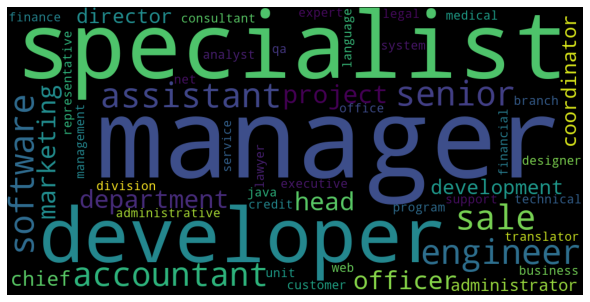

In [48]:
# plot the WordCloud image to show top 50 type of demanding jobs in armenia     
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(top_jobs[:50].Word))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Job Nature changing over time

We can use dispersion plot to see how jobs change over time. To do this we need to get the important topics out of the jobpost and then plot their dispersion over time.

In [49]:
jobs['jobpost'] = jobs['jobpost'].astype('str')

In [50]:
#UDF to do basic cleaning of title column to understand type of jobs
def clean_data(text):
    text = text.lower()  # convert all the text into lowercase
    text = text.strip()  #remove starting and trailing whitespaces
    #special_chars = re.compile('[@!#$%^&*()<>?/\|}{~:;]')
    #text = re.sub(special_chars,'', text)
    special_char_reg = '([a-zA-Z0-9]+)' + '[!"#$%&\'()*+,-./:;<=>?@\\^_`{|}~]' + '([a-zA-Z0-9]+)'
    text = re.sub(special_char_reg, ' ', text)
    text = re.sub(r'\s+', ' ', text) #remove all line formattings
    text = re.sub(r'\d+', '', text) #remove digits
    text = ''.join(c for c in text if c not in string.punctuation)   #remove pecial symbols from job titles
    return text

In [51]:
jobs.jobpost.head()

0    AMERIA Investment Consulting Company\r\nJOB TI...
1    International Research & Exchanges Board (IREX...
2    Caucasus Environmental NGO Network (CENN)\r\nJ...
3    Manoff Group\r\nJOB TITLE:  BCC Specialist\r\n...
4    Yerevan Brandy Company\r\nJOB TITLE:  Software...
Name: jobpost, dtype: object

In [52]:
jobpost_df = jobs.jobpost.apply(lambda x : clean_data(x))

In [53]:
jobpost_df.head(10)

0    ameria investment consulting company job title...
1    international research  exchanges board irex t...
2    caucasus environmental ngo network cenn job ti...
3    manoff group job title bcc specialist position...
4    yerevan brandy company job title software deve...
5    boutique appollo job title saleswoman position...
6    osi assistance foundation  armenian branch off...
7    international research  exchanges board irex t...
8    yerevan brandy company job title assistant to ...
9    american embassy yerevan announcement number j...
Name: jobpost, dtype: object

In [54]:
##Lematization
import spacy
#neccesary to download the english model using "python -m spacy download en"
#nlp = spacy.load('en_core_web_sm')
lemmatized_out = []
count = 0
for jobpost in jobpost_df:
    doc = nlp(jobpost)
    x = " ".join(word.lemma_ for word in doc)
    print(count)
    count += 1
    lemmatized_out.append(x)

Streaming output truncated to the last 5000 lines.
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880
13881
13882
13883
13884
13885
13886
13887
13888
13889
13890
13891
13892
13893
13894
13895
13896
13897
13898
13899
13900
13901
13902
13903
13904
13905
13906
13907
13908
13909
13910
13911
13912
13913
13914
13915
13916
13917
13918
13919
13920
13921
13922
13923
13924
13925
13926
13927
13928
13929
13930
13931
13932
13933
13934
13935
13936
13937
13938
13939
13940
13941
13942
13943
13944
13945
13946
13947
13948
13949
13950
13951
13952
13953
13954
13955
13956
13957
13958
13959
13960
13961
13962
13963
13964
13965
13966
13967
13968
13969
13970
13971
13972
13973
13974
13975
13976
13977
13978
13979
13980
13981
13982
13983
13984
13985
13986
13987
13988
13989
13990
13991
13992
13993
13994
13995
13996
13997
13998
13999
14000
14001
14002
14003
14004
14005
14006
14007
14008
14009
14010
14011
14012
14013
14014
14015
14016
14017
14018
14019
14020
14021
14022
1

In [153]:
lemmatized_out[0]

'ameria investment consulting company job title chief financial officer position location yerevan armenia job description ameria investment consulting company be seek a chief financial officer this position manage the fiscal and administrative function provide highly responsible and technically complex staff assistance to the executive director the work perform require a high level of technical proficiency in financial management and investment management as well as management supervisory and administrative skill job responsibility   supervise financial management and administrative staff include assign responsibility review employee work process and product counsel employee give performance evaluation and recommend disciplinary action   serve as member of management team participate in both strategic and operational planning for the company   direct and oversee the financial management activity include establish and monitor internal control manage cash and investment and manage the in

In [56]:
#Stop words removal
stop = nltk.corpus.stopwords.words('english')
stop.extend(['armenian', 'armenia', 'job', 'title', 'position', 'location', 'responsibility', 'application',
             'procedure', 'deadline', 'requirement','qualification', 'renumeration', 'salary', 'date', 'company', 'llc',
             'person', 'employement', 'post', 'follow', 'resume', 'open', 'about', 'announcement', 'link', 'website',
             'organization', 'duration'])

In [57]:
jobpost_df_0 = pd.Series(lemmatized_out)

In [58]:
jobpost_df.head(10)

0    ameria investment consulting company job title...
1    international research  exchanges board irex t...
2    caucasus environmental ngo network cenn job ti...
3    manoff group job title bcc specialist position...
4    yerevan brandy company job title software deve...
5    boutique appollo job title saleswoman position...
6    osi assistance foundation  armenian branch off...
7    international research  exchanges board irex t...
8    yerevan brandy company job title assistant to ...
9    american embassy yerevan announcement number j...
Name: jobpost, dtype: object

In [59]:
jobpost_df_1 = jobpost_df.apply(lambda x : ' '.join(word for word in x.split() if word not in stop))

In [ ]:
jobpost_df_1.head(10)

In [ ]:
#Now we will create tokens out of this processed data

tfidf_vect = TfidfVectorizer(ngram_range=(1,1), min_df=0.05, max_df=0.95)
tfidf_vect

In [ ]:
token_jobpost = tfidf_vect.fit_transform(jobpost_df_1)

In [63]:
vocab = tfidf_vect.get_feature_names()
print(vocab)

['ability', 'access', 'accordance', 'according', 'accounting', 'accounts', 'accuracy', 'accurate', 'activities', 'activity', 'additional', 'address', 'administration', 'administrative', 'advanced', 'advantage', 'also', 'amd', 'analysis', 'analytical', 'analyze', 'annual', 'applicants', 'applications', 'apply', 'applying', 'appropriate', 'april', 'area', 'areas', 'asap', 'asked', 'assessment', 'asset', 'assigned', 'assist', 'assistance', 'assistant', 'attached', 'attachments', 'attention', 'august', 'availability', 'background', 'bank', 'banking', 'based', 'basic', 'basis', 'benefits', 'best', 'branch', 'budget', 'build', 'building', 'business', 'call', 'calls', 'candidate', 'candidates', 'capacity', 'carry', 'chief', 'civil', 'cjsc', 'client', 'clients', 'closely', 'code', 'com', 'commercial', 'communicate', 'communication', 'communications', 'community', 'companies', 'competitive', 'complete', 'complex', 'compliance', 'comprehensive', 'computer', 'conduct', 'considered', 'consulting',

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
token_jobpost

In [ ]:
len(tfidf_vect.get_feature_names())

In [66]:
token_df = pd.DataFrame(token_jobpost.toarray(), columns=tfidf_vect.get_feature_names())
token_df.head()

,ability,access,accordance,according,accounting,accounts,accuracy,accurate,activities,activity,...,work,working,works,world,write,writing,written,year,years,yerevan
0,0.044338,0.0,0.0,0.0,0.332758,0.0,0.0,0.0,0.065864,0.0,...,0.061392,0.000000,0.0,0.00000,0.0,0.029685,0.000000,0.0,0.015551,0.010355
1,0.040244,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.033434,0.000000,0.0,0.00000,0.0,0.000000,0.060036,0.0,0.000000,0.169174
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.136950,0.0,0.00000,0.0,0.000000,0.070304,0.0,0.049588,0.033018
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.066027,0.0,...,0.055390,0.096874,0.0,0.05122,0.0,0.000000,0.033154,0.0,0.023385,0.000000
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.099399,0.0,...,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.070408,0.140642


In [67]:
#Apply LDA technique to understand important job nature and profiles

lda = decomposition.LatentDirichletAllocation(n_components = 5, learning_method = 'online', max_iter = 50, random_state = 3)
lda.fit_transform(token_jobpost)
topics = lda.components_

In [68]:
topics

array([[3.11461782e+02, 1.89655123e+01, 3.56229022e+01, ...,
        9.26104024e+01, 1.27587366e+02, 2.89212129e+02],
       [2.05388064e-01, 2.02200447e-01, 2.02973322e-01, ...,
        2.02997768e-01, 2.02849261e-01, 5.89802702e+00],
       [2.56490646e+02, 2.60453958e+01, 2.43670786e+01, ...,
        6.39049982e+01, 1.69104141e+02, 1.72898296e+02],
       [1.57161829e+02, 4.91431747e+01, 4.24576797e+01, ...,
        5.59299967e+01, 1.16721970e+02, 1.46868735e+02],
       [1.50834294e+02, 1.17428156e+01, 5.03508737e+01, ...,
        6.90337148e+01, 1.16279969e+02, 1.30802487e+02]])

In [69]:
# view the topic models for cluster 0
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topics):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['sales marketing skills knowledge work russian excellent candidates ability languages',
 'medical insurance representative visits health regular promote presentations organize photo',
 'software development design knowledge experience web developer engineer technical team',
 'project development program international management training activities experience implementation office',
 'accounting bank financial credit knowledge finance banking cjsc legal tax']

In [70]:
vocab = []
def fn_token(post):
    list_temp = nltk.word_tokenize(post)
    vocab.extend(list_temp)

jobpost_df_1.apply(lambda x : fn_token(x))

0        None
1        None
2        None
3        None
4        None
         ... 
18996    None
18997    None
18998    None
18999    None
19000    None
Name: jobpost, Length: 18865, dtype: object

In [71]:
full_vocab = []
for word in  vocab:
       if word not in full_vocab:
        full_vocab.append(word)

In [72]:
print(full_vocab)

['ameria', 'investment', 'consulting', 'chief', 'financial', 'officer', 'yerevan', 'description', 'seeking', 'manages', 'fiscal', 'administrative', 'functions', 'provides', 'highly', 'responsible', 'technically', 'complex', 'staff', 'assistance', 'executive', 'director', 'work', 'performed', 'requires', 'high', 'level', 'technical', 'proficiency', 'management', 'well', 'supervisory', 'skills', 'responsibilities', 'supervises', 'including', 'assigning', 'reviewing', 'employees', 'processes', 'products', 'counseling', 'giving', 'performance', 'evaluations', 'recommending', 'disciplinary', 'action', 'serves', 'member', 'team', 'participating', 'strategic', 'operational', 'planning', 'directs', 'oversees', 'activities', 'establishing', 'monitoring', 'internal', 'controls', 'managing', 'cash', 'investments', 'portfolio', 'collaboration', 'leader', 'includes', 'limited', 'evaluation', 'risk', 'concentration', 'fund', 'deployment', 'levels', 'adequacy', 'loss', 'liquidity', 'reserves', 'assis

In [73]:
topic_words_tokens = []
for topic in topic_summaries:
    word_token = nltk.word_tokenize(topic)
    topic_words_tokens.extend(word_token)
print(topic_words_tokens)


['sales', 'marketing', 'skills', 'knowledge', 'work', 'russian', 'excellent', 'candidates', 'ability', 'languages', 'medical', 'insurance', 'representative', 'visits', 'health', 'regular', 'promote', 'presentations', 'organize', 'photo', 'software', 'development', 'design', 'knowledge', 'experience', 'web', 'developer', 'engineer', 'technical', 'team', 'project', 'development', 'program', 'international', 'management', 'training', 'activities', 'experience', 'implementation', 'office', 'accounting', 'bank', 'financial', 'credit', 'knowledge', 'finance', 'banking', 'cjsc', 'legal', 'tax']


Populating the interactive namespace from numpy and matplotlib


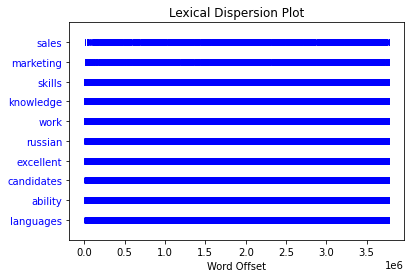

In [74]:

#use lexical dispersion plot to see the topics used over time
#Start pylab inline mode, so figures will appear in the notebook
%pylab inline

from nltk.draw.dispersion import dispersion_plot

dispersion_plot(vocab, topic_words_tokens[:10])

In [75]:
plot_df = pd.concat([jobpost_df_1, jobs.year], axis = 1)
#plot_df = jobpost_df_2.apply(lambda x : fn() )
plot_df

,jobpost,year
0,ameria investment consulting chief financial o...,2004
1,international research exchanges board irex co...,2004
2,caucasus environmental ngo network cenn countr...,2004
3,manoff group bcc specialist manila philippines...,2004
4,yerevan brandy software developer yerevan resp...,2004
...,...,...
18996,technolinguistics ngo senior creative ux ui de...,2015
18997,hellenic bottling cjsc category development ma...,2015
18998,hellenic bottling cjsc operational marketing m...,2015
18999,san lazzaro head online sales department yerev...,2015


In [76]:
topic_words_tokens[:10]

['sales',
 'marketing',
 'skills',
 'knowledge',
 'work',
 'russian',
 'excellent',
 'candidates',
 'ability',
 'languages']

In [77]:
('topic', '2018')

('topic', '2018')

In [78]:
nt = [(topic, year)  for year in plot_df.year  for topic in topic_words_tokens[0:9] ]

In [79]:
# cfd = nltk.ConditionalFreqDist(nt)

In [80]:
# #conditional frequency distribution plot to see the use of topics over time
# cfd = nltk.ConditionalFreqDist(
#     (target, year)
#     for year in plot_df.year
#     for a in plot_df.jobpost
#     for w in nltk.word_tokenize(a)    
#     for target in topic_words_tokens[:10]
#     if w.lower().startswith(target))
# cfd.plot()



# Desired characteristics and  Skill-sets
To understand this we can make clusters using job description column of the data

In [81]:
jobs.columns = jobs.columns.str.lower()

In [82]:
x = jobs[jobs.jobdescription.isna() == False]

In [83]:
jobs.shape

(18865, 24)

In [84]:
x.shape

(15040, 24)

In [85]:
x.head()

,jobpost,date,title,company,announcementcode,term,eligibility,audience,startdate,duration,...,salary,applicationp,openingdate,deadline,notes,aboutc,attach,year,month,it
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
5,"Boutique ""Appollo""\r\nJOB TITLE: Saleswoman\r...","Jan 10, 2004",Saleswoman,"Boutique ""Appollo""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For further information, please contact Irina\...",NaN,01 February 2004,NaN,NaN,NaN,2004,1,False
6,OSI Assistance Foundation - Armenian Branch Of...,"Jan 11, 2004",Chief Accountant/ Finance Assistant,OSI Assistance Foundation - Armenian Branch Of...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For submission of applications/ CVs, please\r\...",NaN,"16 January 2004, 6:00 pm.",NaN,NaN,NaN,2004,1,False


#### Text pre-processing

In [86]:
x['jobdescription'] = x['jobdescription'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
desc_df = x.jobdescription.apply(lambda x : clean_data(x))
desc_df.head()

0    ameria investment consulting company is seekin...
2    public outreach and strengthening of a growing...
3    the lead local enhancement and development for...
5        saleswoman will sell menswear and accessories
6    the armenian branch office of the open society...
Name: jobdescription, dtype: object

In [88]:
#LEmmatization
desc_df_1 = desc_df.apply(lambda x : lemma(x))

In [89]:
#lemmatized_out[0:6]

In [90]:
#desc_df_0 = pd.Series(lemmatized_out)

In [91]:
desc_df_1.head()

0    ameria investment consulting company is seekin...
2    public outreach and strengthening of a growing...
3    the lead local enhancement and development for...
5          saleswoman will sell menswear and accessory
6    the armenian branch office of the open society...
Name: jobdescription, dtype: object

In [92]:
#stop word removal
desc_df_1 = desc_df_1.apply(lambda x : ' '.join(x for x in x.split() if x not in stop))

In [93]:
desc_df_1.head()

0    ameria investment consulting seeking chief fin...
2    public outreach strengthening growing network ...
3    lead local enhancement development health bcc ...
5                   saleswoman sell menswear accessory
6    branch office society institute assistance fou...
Name: jobdescription, dtype: object

In [94]:
#Tokenization
tfidf_vect = TfidfVectorizer(ngram_range=(1,1), min_df = 0.05, max_df=0.95, stop_words='english')
x_tdm = tfidf_vect.fit_transform(desc_df_1)
#print(x_tdm)

In [95]:
df_clust = pd.DataFrame(x_tdm.toarray(), columns=tfidf_vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [96]:
df_clust.head()

,activity,business,candidate,cjsc,customer,department,design,develop,developer,development,...,specialist,staff,supervision,support,team,technical,web,work,working,yerevan
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.257834,0.0,0.000000,0.0,0.246516,0.0,0.178450,0.000000,0.0
1,0.0,0.702323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116751,...,0.152377,0.353123,0.0,0.283316,0.0,0.000000,0.0,0.244401,0.343432,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


### Clustering

#### Dimension Reduction

In [97]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [98]:

model = KMeans(n_clusters=5, 
               init='k-means++', 
               max_iter=100, n_init=1,random_state=5)
kmeans = model.fit(x_tdm)

In [99]:
# we create a kmeans model
km_3 = KMeans(n_clusters=3,init='k-means++', max_iter=100, n_init=1, random_state=5).fit(x_tdm)
km_4 = KMeans(n_clusters=4,init='k-means++', max_iter=100, n_init=1, random_state=5).fit(x_tdm)
km_5 = KMeans(n_clusters=5,init='k-means++', max_iter=100, n_init=1, random_state=5).fit(x_tdm)
km_6 = KMeans(n_clusters=6,init='k-means++', max_iter=100, n_init=1, random_state=5).fit(x_tdm)
km_7 = KMeans(n_clusters=7,init='k-means++', max_iter=100, n_init=1, random_state=5).fit(x_tdm)
km_8 = KMeans(n_clusters=8,init='k-means++', max_iter=100, n_init=1, random_state=5).fit(x_tdm)
km_9 = KMeans(n_clusters=9,init='k-means++', max_iter=100, n_init=1, random_state=5).fit(x_tdm)

In [100]:
# save the cluster labels and sort by cluster
x['cluster_3'] = km_3.labels_
x['cluster_4'] = km_4.labels_
x['cluster_5'] = km_5.labels_
x['cluster_6'] = km_6.labels_
x['cluster_7'] = km_7.labels_
x['cluster_8'] = km_8.labels_
x['cluster_9'] = km_9.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [101]:
len(tfidf_vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


51

In [102]:
vocab = np.array(tfidf_vect.get_feature_names())
vocab

array(['activity', 'business', 'candidate', 'cjsc', 'customer',
       'department', 'design', 'develop', 'developer', 'development',
       'direct', 'director', 'engineer', 'ensure', 'experienced',
       'financial', 'highly', 'implementation', 'incumbent',
       'international', 'looking', 'management', 'manager', 'motivated',
       'office', 'operation', 'process', 'product', 'professional',
       'program', 'project', 'provide', 'qualified', 'quality', 'report',
       'responsible', 'sale', 'seeking', 'senior', 'service', 'software',
       'specialist', 'staff', 'supervision', 'support', 'team',
       'technical', 'web', 'work', 'working', 'yerevan'], dtype='<U14')

In [103]:
cluster_centers = np.array(km_5.cluster_centers_)
cluster_centers[0].argsort()

array([11, 10, 25, 43, 42, 34, 15, 36, 24, 22, 31, 29, 13,  4,  5, 50,  0,
       19, 41, 21, 44, 28, 46,  1, 39, 26, 32, 17,  3,  7, 18, 35,  2, 16,
       14, 33, 48, 23, 49, 30, 37, 27,  6, 20, 38, 47, 12, 45,  9,  8, 40])

In [104]:
km_3.labels_

array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

In [105]:
x['cluster_3'].value_counts()/sum(x['cluster_3'].value_counts())

1    0.439694
0    0.353191
2    0.207114
Name: cluster_3, dtype: float64

In [106]:
x['cluster_4'].value_counts()/sum(x['cluster_4'].value_counts())

1    0.402593
0    0.287035
2    0.176529
3    0.133843
Name: cluster_4, dtype: float64

In [107]:
x['cluster_5'].value_counts()/sum(x['cluster_5'].value_counts())

1    0.391223
4    0.166223
0    0.164960
2    0.153059
3    0.124535
Name: cluster_5, dtype: float64

In [108]:
x['cluster_6'].value_counts()/sum(x['cluster_6'].value_counts())

1    0.370080
4    0.151263
0    0.137234
3    0.126197
5    0.123737
2    0.091489
Name: cluster_6, dtype: float64

In [109]:
x['cluster_7'].value_counts()/sum(x['cluster_7'].value_counts())

1    0.297473
6    0.169947
4    0.128923
5    0.127593
3    0.107779
0    0.088697
2    0.079588
Name: cluster_7, dtype: float64

In [110]:
x['cluster_8'].value_counts()/sum(x['cluster_8'].value_counts())

1    0.286835
7    0.159973
5    0.118484
3    0.116822
6    0.110971
0    0.093684
2    0.061636
4    0.051596
Name: cluster_8, dtype: float64

Either 5-6 , is the optimal solution for our clusters

### Evaluation clusters

### 1. Silhouette Coefficient(Higher the better)

In [111]:
from sklearn import  metrics
metrics.silhouette_score(x_tdm, labels=km_3.labels_)

0.04537816158841284

In [112]:
scores = []
scores.append(metrics.silhouette_score(x_tdm, labels=km_3.labels_))
scores.append(metrics.silhouette_score(x_tdm, labels=km_4.labels_))
scores.append(metrics.silhouette_score(x_tdm, labels=km_5.labels_))
scores.append(metrics.silhouette_score(x_tdm, labels=km_6.labels_))
scores.append(metrics.silhouette_score(x_tdm, labels=km_7.labels_))
scores.append(metrics.silhouette_score(x_tdm, labels=km_8.labels_))
scores.append(metrics.silhouette_score(x_tdm, labels=km_9.labels_))
scores

[0.04537816158841284,
 0.04982259835007746,
 0.05877027319706635,
 0.05927312635607443,
 0.06696634076343977,
 0.08079747349758314,
 0.08001107511905013]

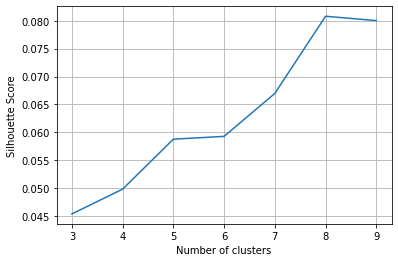

In [113]:
plt.plot(range(3,10), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid('True')

7 Cluster seems to be optimal

In [114]:
# sorting the cluster centers for 5 clusters
sorted_vals = [km_5.cluster_centers_[i].argsort() for i in range(0,np.shape(km_5.cluster_centers_)[0])]

In [115]:
# get top 10 words from that cluster
words=set()
for i in range(len(km_5.cluster_centers_)):
    words = set(vocab[sorted_vals[i][-10:]])
    print(words)

{'product', 'software', 'senior', 'design', 'development', 'team', 'looking', 'web', 'engineer', 'developer'}
{'work', 'service', 'sale', 'activity', 'program', 'manager', 'support', 'office', 'seeking', 'specialist'}
{'product', 'incumbent', 'work', 'responsible', 'operation', 'service', 'development', 'activity', 'supervision', 'management'}
{'responsible', 'work', 'implementation', 'activity', 'development', 'project', 'manager', 'support', 'looking', 'management'}
{'experienced', 'work', 'cjsc', 'professional', 'manager', 'motivated', 'looking', 'qualified', 'candidate', 'specialist'}


In [116]:
# sorting the cluster centers for 6 clusters
sorted_vals = [km_6.cluster_centers_[i].argsort() for i in range(0,np.shape(km_6.cluster_centers_)[0])]

In [117]:
# get top 10 words from that cluster
words=set()
for i in range(len(km_6.cluster_centers_)):
    words = set(vocab[sorted_vals[i][:10]])
    print(words)

{'staff', 'operation', 'direct', 'sale', 'supervision', 'director', 'financial', 'office', 'customer', 'report'}
{'working', 'work', 'software', 'senior', 'project', 'looking', 'motivated', 'web', 'engineer', 'developer'}
{'implementation', 'operation', 'senior', 'highly', 'business', 'ensure', 'financial', 'quality', 'process', 'software'}
{'experienced', 'software', 'cjsc', 'sale', 'operation', 'highly', 'motivated', 'web', 'customer', 'department'}
{'implementation', 'staff', 'direct', 'project', 'program', 'provide', 'supervision', 'ensure', 'seeking', 'software'}
{'experienced', 'software', 'cjsc', 'professional', 'yerevan', 'highly', 'motivated', 'looking', 'qualified', 'developer'}


Above analysis shows that in cluster 6 the tokens get repeated and clusters are more similar to each other. That means **cluster 5** is optimal. 

# IT Job Classification

In [118]:
class_data = jobs[(jobs.title.isna() == False) & (jobs.jobrequirment.isna() == False) & (jobs.requiredqual.isna() == False) &
                 (jobs.jobdescription.isna() == False) & (jobs.aboutc.isna() == False) & (jobs.company.isna() == False)]

In [119]:
class_data.shape

(8983, 24)

In [120]:
class_data.head()

,jobpost,date,title,company,announcementcode,term,eligibility,audience,startdate,duration,...,salary,applicationp,openingdate,deadline,notes,aboutc,attach,year,month,it
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
22,ACDI/VOCA\r\nJOB TITLE: Marketing Advisor\r\n...,"Jan 19, 2004",Marketing Advisor,ACDI/VOCA,NaN,NaN,NaN,NaN,NaN,30 month position \r\nPOSITION,...,NaN,Submit CV and salary requirements toeurasia@.....,NaN,NaN,NaN,ACDI/VOCA is an international development and ...,NaN,2004,1,False
56,ARQELL CJSC\r\nJOB TITLE: Manufacturing Chief...,"Feb 8, 2004",Manufacturing Chief,ARQELL CJSC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,If you meet the requirements above and are\r\n...,NaN,Open,NaN,ARQELL CJSC is a multidisciplinary manufacturi...,NaN,2004,2,False
64,Accion Contra el Hambre - Armenia\r\nJOB TITLE...,"Feb 12, 2004",Administrative Assistant/ Secretary,Accion Contra el Hambre - Armenia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To be considered, please e-mail a detailed\r\n...",NaN,"20 February 2004, 5:00 p.m.",NaN,Accion Contra el Hambre (ACH) is a Spanish hum...,NaN,2004,2,False
67,Interagent LLC\r\nJOB TITLE: Salesman / Trade...,"Feb 16, 2004",Salesman / Trade agent,Interagent LLC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please e-mail your resume and 1 photo (3x4) to...,NaN,20 February 2004,NaN,Interagent LLC is a distributor of several mul...,NaN,2004,2,False


In [121]:
class_data.isna().sum()

jobpost                0
date                   0
title                  0
company                0
announcementcode    8369
term                4354
eligibility         6609
audience            8638
startdate           3821
duration            2856
location               1
jobdescription         0
jobrequirment          0
requiredqual           0
salary              3545
applicationp           0
openingdate          125
deadline               4
notes               8028
aboutc                 0
attach              8521
year                   0
month                  0
it                     0
dtype: int64

In [122]:
class_data.shape

(8983, 24)

In [123]:
#identify Y variable
class_data['it'] = class_data.it.apply(lambda x : 0 if (x is False) else 1)
y=class_data['it']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
y.value_counts()

0    6770
1    2213
Name: it, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


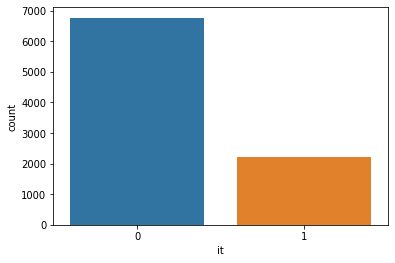

In [125]:
sns.countplot(y)

In [126]:
class_data = class_data['title'].str.cat(class_data['jobrequirment'], sep =" ").str.cat(class_data['requiredqual'], sep =" ").str.cat(
    class_data['jobdescription'], sep =" ").str.cat(class_data['aboutc'], sep =" ").str.cat(class_data['company'], sep =" ")
class_df = class_data

In [127]:
class_df.head()

2     Country Coordinator - Working with the Country...
22    Marketing Advisor - Lead the effort to identif...
56    Manufacturing Chief - To manage all manufactur...
64    Administrative Assistant/ Secretary - To welco...
67    Salesman / Trade agent - To distribute and dis...
Name: title, dtype: object

### Text pre-processing

In [128]:
class_df = class_df.apply(lambda x : clean_data(str(x)))
class_df.head()

2     country coordinator  working with the country ...
22    marketing advisor  lead the effort to identify...
56    manufacturing chief  to manage all manufacturi...
64    administrative assistant secretary  to welcome...
67    salesman  trade agent  to distribute and displ...
Name: title, dtype: object

In [129]:
#Lemmatization
class_df_1 = class_df.apply(lambda x : lemma(x))

In [130]:
class_df_1.head()

2     country coordinator working with the country d...
22    marketing advisor lead the effort to identify ...
56    manufacturing chief to manage all manufacturin...
64    administrative assistant secretary to welcome ...
67    salesman trade agent to distribute and display...
Name: title, dtype: object

In [131]:
#stop word removal
class_df_1 = class_df_1.apply(lambda x : ' '.join(x for x in x.split() if x not in stop))

In [132]:
class_df_1.head()

2     country coordinator working country director p...
22    marketing advisor lead effort identify target ...
56    manufacturing chief manage manufacturing funct...
64    administrative assistant secretary welcome vis...
67    salesman trade agent distribute display import...
Name: title, dtype: object

In [133]:
#Tokenization
tfidf_vect = TfidfVectorizer(ngram_range=(1,1), min_df = 0.05, max_df=0.95, stop_words='english')
x_tdm = tfidf_vect.fit_transform(class_df_1)
#print(x_tdm)

In [134]:
df_clust = pd.DataFrame(x_tdm.toarray(), columns=tfidf_vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [135]:
df_clust.head()

,ability,access,accordance,according,account,accountant,accounting,accuracy,accurate,achieve,...,window,word,work,working,world,write,writing,written,year,yerevan
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.124281,0.0,0.0,0.0,0.063444,0.040282,0.000000
1,0.014903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.038868,0.031143,0.012672,0.000000,0.0,0.0,0.0,0.000000,0.043385,0.000000
2,0.032927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.111998,0.000000,0.0,0.0,0.0,0.050326,0.031953,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.128974,0.000000,0.000000,0.0,0.0,0.0,0.094327,0.059890,0.122707
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.328713,...,0.000000,0.000000,0.000000,0.177319,0.0,0.0,0.0,0.000000,0.229889,0.000000


## Building a Random Forest Model

#### Divide the data into train and test

In [136]:
df_clust.shape

(8983, 489)

In [137]:
from sklearn.model_selection import train_test_split

train_x, test_x,train_y, test_y = train_test_split(df_clust,y, test_size = 0.2, random_state = 5)
print(train_x.shape, test_x.shape)

(7186, 489) (1797, 489)


In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [139]:
param_grid = {'n_estimators':[130,150,160,180,200],
              'max_features':[13,15,17,19]}

grid_rf = GridSearchCV(estimator= RandomForestClassifier(),
                      param_grid=param_grid,
                      cv = 10,
                      n_jobs=-1, verbose=True)

grid_rf.fit(train_x,train_y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [13, 15, 17, 19],
                         'n_estimators': [130, 150, 160, 180, 200]},
             verbose=True)

In [140]:
grid_rf.best_score_

0.9494864811464392

In [141]:
grid_rf.best_params_

{'max_features': 19, 'n_estimators': 200}

In [142]:
grid_rf.best_estimator_

RandomForestClassifier(max_features=19, n_estimators=200)

In [143]:
#Fit the model
rf_model = grid_rf.best_estimator_
rf_model.fit(train_x, train_y)

RandomForestClassifier(max_features=19, n_estimators=200)

#### Prdict the output for train and validation set

In [144]:
rf_train_predict = pd.DataFrame({'actual' : train_y,
                                 'predicted' : rf_model.predict(train_x)})
rf_train_predict.head()

,actual,predicted
15451,0,0
16606,0,0
2261,0,0
360,0,0
5891,0,0


In [145]:
rf_test_predict = pd.DataFrame({'actual' : test_y,
                                 'predicted' : rf_model.predict(test_x)})
rf_test_predict.head()

,actual,predicted
18900,1,1
851,0,0
16559,1,1
826,0,0
11525,0,0


# Model Evaluation

In [146]:
#1. Check accuracy score on train and test

print('Accuracy Score for train dataset : ' , metrics.accuracy_score(rf_train_predict.actual, rf_train_predict.predicted))
print('Accuracy Score for test dataset : ' , metrics.accuracy_score(rf_test_predict.actual, rf_test_predict.predicted))

Accuracy Score for train dataset :  0.9998608405232396
Accuracy Score for test dataset :  0.9382303839732888


In [147]:
#2. Check roc_auc score on train and test

print('ROC-AUC Score for train dataset : ' , metrics.roc_auc_score(rf_train_predict.actual, rf_train_predict.predicted))
print('ROC-AUC Score for validation dataset : ' , metrics.roc_auc_score(rf_test_predict.actual, rf_test_predict.predicted))

ROC-AUC Score for train dataset :  0.9997176736307172
ROC-AUC Score for validation dataset :  0.9003498021405553


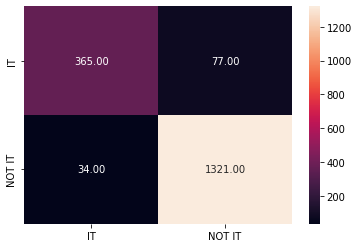

In [148]:
#3. Create confusion matrix
#for test

conn_cm_test = metrics.confusion_matrix(rf_test_predict.actual, rf_test_predict.predicted, labels=[1,0])
sns.heatmap(conn_cm_test, fmt= '.2f', annot=True,  xticklabels=['IT', 'NOT IT'], yticklabels=['IT', 'NOT IT'])

In [149]:
#4. Create classification report
print(metrics.classification_report(rf_test_predict.actual, rf_test_predict.predicted))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1355
           1       0.91      0.83      0.87       442

    accuracy                           0.94      1797
   macro avg       0.93      0.90      0.91      1797
weighted avg       0.94      0.94      0.94      1797



In [150]:
indices = np.argsort(rf_model.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])
for f in range(train_x.shape[1]):
    feature_rank.loc[f] = [f+1,
                          train_x.columns[indices[f]],
                          rf_model.feature_importances_[indices[f]]]
feature_rank.round(3)

,rank,feature,importance
0,1,developer,0.070
1,2,software,0.062
2,3,design,0.030
3,4,experience,0.028
4,5,technology,0.026
...,...,...,...
484,485,oversee,0.000
485,486,cash,0.000
486,487,statement,0.000
487,488,value,0.000


In [151]:
feature_rank[:17]

,rank,feature,importance
0,1,developer,0.070206
1,2,software,0.062454
2,3,design,0.030199
3,4,experience,0.027785
4,5,technology,0.026288
5,6,javascript,0.023324
6,7,sql,0.022066
7,8,programming,0.020436
8,9,java,0.020325
9,10,web,0.020126


## Export Model

In [152]:
import pickle
filename = 'rf_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


Presence of keywords like software, developer, web, design, cs are the important feautures while clasifying any job as **IT or NON-IT**